<a href="https://colab.research.google.com/github/javier06github/Desafio_ONE_TelecomX/blob/main/TelecomX_LATAM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#üìå Extracci√≥n

In [5]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
import pandas as pd

# Asegurate de usar la ruta correcta
file_path = "/content/drive/MyDrive/Colab Notebooks/TelecomX_Data.json"
df = pd.read_json(file_path)
df.head()


customerID Churn                                           customer  \
0  0002-ORFBO    No  {'gender': 'Female', 'SeniorCitizen': 0, 'Part...   
1  0003-MKNFE    No  {'gender': 'Male', 'SeniorCitizen': 0, 'Partne...   
2  0004-TLHLJ   Yes  {'gender': 'Male', 'SeniorCitizen': 0, 'Partne...   
3  0011-IGKFF   Yes  {'gender': 'Male', 'SeniorCitizen': 1, 'Partne...   
4  0013-EXCHZ   Yes  {'gender': 'Female', 'SeniorCitizen': 1, 'Part...   

                                             phone  \
0   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
1  {'PhoneService': 'Yes', 'MultipleLines': 'Yes'}   
2   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
3   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
4   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   

                                            internet  \
0  {'InternetService': 'DSL', 'OnlineSecurity': '...   
1  {'InternetService': 'DSL', 'OnlineSecurity': '...   
2  {'InternetService': 'Fiber optic', 'OnlineSecu...   
3  {'InternetService': 'Fiber optic', 'OnlineSecu...   
4  {'InternetService': 'Fiber optic', 'OnlineSecu...   

                                             account  
0  {'Contract': 'One year', 'PaperlessBilling': '...  
1  {'Contract': 'Month-to-month', 'PaperlessBilli...  
2  {'Contract': 'Month-to-month', 'PaperlessBilli...  
3  {'Contract': 'Month-to-month', 'PaperlessBilli...  
4  {'Contract': 'Month-to-month', 'PaperlessBilli...

#üîß Transformaci√≥n

In [7]:

df = pd.json_normalize(df.to_dict(orient="records"))


df_clean = df.copy()


categorical_cols = df_clean.select_dtypes(include="object").columns
df_clean[categorical_cols] = df_clean[categorical_cols].fillna("unknown")


for col in categorical_cols:
    df_clean[col] = df_clean[col].str.lower().str.strip()


df_clean.drop_duplicates(inplace=True)


print("‚úî Valores nulos restantes:", df_clean.isnull().sum().sum())
print("‚úî Duplicados eliminados:", df_clean.duplicated().sum())
print("‚úî DataFrame final:", df_clean.shape)


‚úî Valores nulos restantes: 0
‚úî Duplicados eliminados: 0
‚úî DataFrame final: (7267, 21)


In [8]:
# Crear columna "account.Charges.Daily" como facturaci√≥n mensual dividida por 30 d√≠as
df_clean["account.Charges.Daily"] = df_clean["account.Charges.Monthly"] / 30

# Mostrar algunas filas para verificar
df_clean[["account.Charges.Monthly", "account.Charges.Daily"]].head()


account.Charges.Monthly  account.Charges.Daily
0                     65.6               2.186667
1                     59.9               1.996667
2                     73.9               2.463333
3                     98.0               3.266667
4                     83.9               2.796667

In [9]:
import numpy as np

# Copia del DataFrame limpio
df_std = df_clean.copy()

# 1. Convertimos nombres de columnas a min√∫sculas
df_std.columns = df_std.columns.str.lower()

# 2. Mapeo binario: yes ‚Üí 1, no ‚Üí 0, unknown ‚Üí -1
binarios_map = {'yes': 1, 'no': 0, 'unknown': -1}

# 3. Detectamos columnas que contengan esos valores
cols_a_mapeo = [
    col for col in df_std.columns
    if df_std[col].dropna().astype(str).str.lower().isin(['yes', 'no', 'unknown']).any()
]

# 4. Aplicamos el mapeo binario
for col in cols_a_mapeo:
    df_std[col] = df_std[col].map(lambda x: binarios_map.get(str(x).lower(), x))



# 6. Crear columna daily charges si no existe
if "account.charges.monthly" in df_std.columns and "account.charges.daily" not in df_std.columns:
    df_std["account.charges.daily"] = df_std["account.charges.monthly"] / 30

# 7. Reemplazar -1 por NaN para an√°lisis estad√≠stico correcto
df_std.replace(-1, np.nan, inplace=True)

# 8. Vista previa
df_std.head()


customerid churn customer.gender  customer.seniorcitizen  customer.partner  \
0  0002-orfbo     0          female                       0                 1   
1  0003-mknfe     0            male                       0                 0   
2  0004-tlhlj     1            male                       0                 0   
3  0011-igkff     1            male                       1                 1   
4  0013-exchz     1          female                       1                 1   

   customer.dependents  customer.tenure  phone.phoneservice  \
0                    1                9                   1   
1                    0                9                   1   
2                    0                4                   1   
3                    0               13                   1   
4                    0                3                   1   

  phone.multiplelines internet.internetservice  ... internet.deviceprotection  \
0                   0                      dsl  ...                         0   
1                   1                      dsl  ...                         0   
2                   0              fiber optic  ...                         1   
3                   0              fiber optic  ...                         1   
4                   0              fiber optic  ...                         0   

  internet.techsupport internet.streamingtv internet.streamingmovies  \
0                    1                    1                        0   
1                    0                    0                        1   
2                    0                    0                        0   
3                    0                    1                        1   
4                    1                    1                        0   

  account.contract account.paperlessbilling account.paymentmethod  \
0         one year                        1          mailed check   
1   month-to-month                        0          mailed check   
2   month-to-month                        1      electronic check   
3   month-to-month                        1      electronic check   
4   month-to-month                        1          mailed check   

   account.charges.monthly account.charges.total  account.charges.daily  
0                     65.6                 593.3               2.186667  
1                     59.9                 542.4               1.996667  
2                     73.9                280.85               2.463333  
3                     98.0               1237.85               3.266667  
4                     83.9                 267.4               2.796667  

[5 rows x 22 columns]

#üìä Carga y an√°lisis

In [10]:
# 1. Estad√≠sticas descriptivas generales (solo columnas num√©ricas)
df_std.describe()


customer.seniorcitizen  customer.partner  customer.dependents  \
count             7267.000000       7267.000000          7267.000000   
mean                 0.162653          0.484106             0.300124   
std                  0.369074          0.499782             0.458343   
min                  0.000000          0.000000             0.000000   
25%                  0.000000          0.000000             0.000000   
50%                  0.000000          0.000000             0.000000   
75%                  0.000000          1.000000             1.000000   
max                  1.000000          1.000000             1.000000   

       customer.tenure  phone.phoneservice  account.paperlessbilling  \
count      7267.000000         7267.000000               7267.000000   
mean         32.346498            0.902711                  0.593230   
std          24.571773            0.296371                  0.491265   
min           0.000000            0.000000                  0.000000   
25%           9.000000            1.000000                  0.000000   
50%          29.000000            1.000000                  1.000000   
75%          55.000000            1.000000                  1.000000   
max          72.000000            1.000000                  1.000000   

       account.charges.monthly  account.charges.daily  
count              7267.000000            7267.000000  
mean                 64.720098               2.157337  
std                  30.129572               1.004319  
min                  18.250000               0.608333  
25%                  35.425000               1.180833  
50%                  70.300000               2.343333  
75%                  89.875000               2.995833  
max                 118.750000               3.958333

In [11]:
# 2. Calcular la mediana
df_std.median(numeric_only=True)


customer.seniorcitizen       0.000000
customer.partner             0.000000
customer.dependents          0.000000
customer.tenure             29.000000
phone.phoneservice           1.000000
account.paperlessbilling     1.000000
account.charges.monthly     70.300000
account.charges.daily        2.343333
dtype: float64

In [12]:
# 3. Ver cantidad de valores nulos por columna
df_std.isnull().sum()


customerid                   0
churn                        0
customer.gender              0
customer.seniorcitizen       0
customer.partner             0
customer.dependents          0
customer.tenure              0
phone.phoneservice           0
phone.multiplelines          0
internet.internetservice     0
internet.onlinesecurity      0
internet.onlinebackup        0
internet.deviceprotection    0
internet.techsupport         0
internet.streamingtv         0
internet.streamingmovies     0
account.contract             0
account.paperlessbilling     0
account.paymentmethod        0
account.charges.monthly      0
account.charges.total        0
account.charges.daily        0
dtype: int64

In [13]:
# 4. Ver tipo de datos de cada columna
df_std.dtypes


customerid                    object
churn                         object
customer.gender               object
customer.seniorcitizen         int64
customer.partner               int64
customer.dependents            int64
customer.tenure                int64
phone.phoneservice             int64
phone.multiplelines           object
internet.internetservice      object
internet.onlinesecurity       object
internet.onlinebackup         object
internet.deviceprotection     object
internet.techsupport          object
internet.streamingtv          object
internet.streamingmovies      object
account.contract              object
account.paperlessbilling       int64
account.paymentmethod         object
account.charges.monthly      float64
account.charges.total         object
account.charges.daily        float64
dtype: object

In [14]:
# 1. Eliminar caracteres no num√©ricos en 'account.charges.total' y convertir a float
df_std['account.charges.total'] = (
    df_std['account.charges.total']
    .astype(str)
    .str.replace('[^\d\.]', '', regex=True)
    .replace('', np.nan)
    .astype(float)
)

# 2. Redondear columnas num√©ricas a 2 decimales (solo para visualizaci√≥n o exportaci√≥n)
cols_numericas = df_std.select_dtypes(include=['float64', 'int64']).columns
df_std[cols_numericas] = df_std[cols_numericas].round(2)

# Verificar tipos actualizados
print(df_std.dtypes)


customerid                    object
churn                         object
customer.gender               object
customer.seniorcitizen         int64
customer.partner               int64
customer.dependents            int64
customer.tenure                int64
phone.phoneservice             int64
phone.multiplelines           object
internet.internetservice      object
internet.onlinesecurity       object
internet.onlinebackup         object
internet.deviceprotection     object
internet.techsupport          object
internet.streamingtv          object
internet.streamingmovies      object
account.contract              object
account.paperlessbilling       int64
account.paymentmethod         object
account.charges.monthly      float64
account.charges.total        float64
account.charges.daily        float64
dtype: object


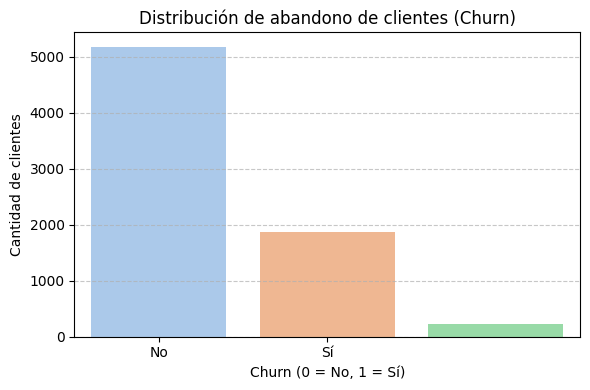

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))
sns.countplot(x='churn', hue='churn', data=df_std, palette='pastel', legend=False)

plt.title("Distribuci√≥n de abandono de clientes (Churn)")
plt.xlabel("Churn (0 = No, 1 = S√≠)")
plt.ylabel("Cantidad de clientes")
plt.xticks([0, 1], ["No", "S√≠"])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


churn
0    5174
1    1869
      224
Name: count, dtype: int64


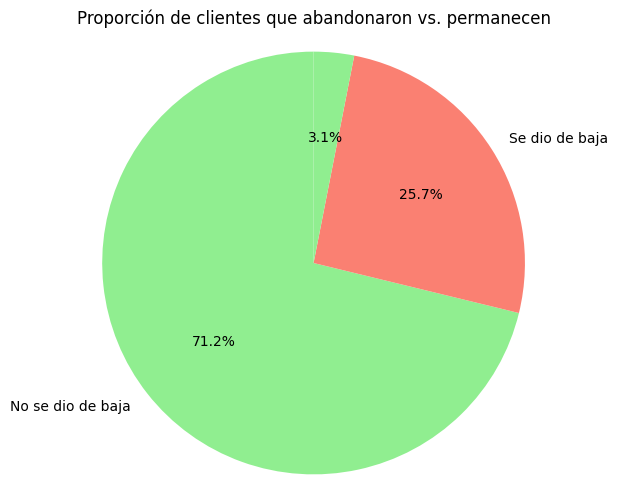

In [16]:
# Verificamos los valores √∫nicos de churn
print(df_std['churn'].value_counts(dropna=False))

# Etiquetas autom√°ticas seg√∫n los valores presentes
labels_dict = {0: "No se dio de baja", 1: "Se dio de baja"}

# Conteo y etiquetas desde los valores reales
churn_counts = df_std['churn'].value_counts()
labels = [labels_dict.get(k, str(k)) for k in churn_counts.index]

# Gr√°fico pie chart
plt.figure(figsize=(6, 6))
plt.pie(churn_counts, labels=labels,
        autopct="%1.1f%%", startangle=90, colors=['lightgreen', 'salmon'])
plt.title("Proporci√≥n de clientes que abandonaron vs. permanecen")
plt.axis('equal')
plt.show()




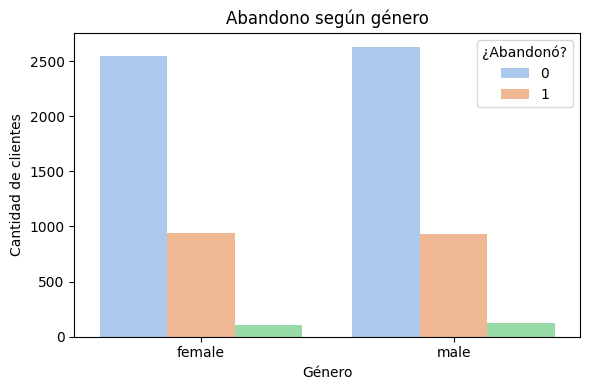

In [17]:
plt.figure(figsize=(6, 4))
sns.countplot(data=df_std, x='customer.gender', hue='churn', palette='pastel')
plt.title("Abandono seg√∫n g√©nero")
plt.xlabel("G√©nero")
plt.ylabel("Cantidad de clientes")
plt.legend(title="¬øAbandon√≥?")
plt.tight_layout()
plt.show()



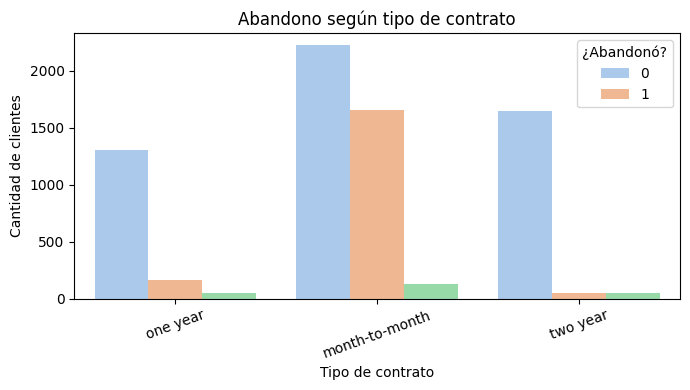

In [18]:
plt.figure(figsize=(7, 4))
sns.countplot(data=df_std, x='account.contract', hue='churn', palette='pastel')
plt.title("Abandono seg√∫n tipo de contrato")
plt.xlabel("Tipo de contrato")
plt.ylabel("Cantidad de clientes")
plt.xticks(rotation=20)
plt.legend(title="¬øAbandon√≥?")
plt.tight_layout()
plt.show()


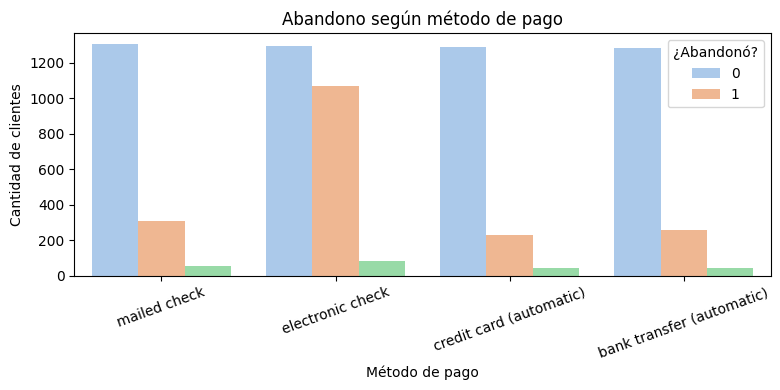

In [19]:
plt.figure(figsize=(8, 4))
sns.countplot(data=df_std, x='account.paymentmethod', hue='churn', palette='pastel')
plt.title("Abandono seg√∫n m√©todo de pago")
plt.xlabel("M√©todo de pago")
plt.ylabel("Cantidad de clientes")
plt.xticks(rotation=20)
plt.legend(title="¬øAbandon√≥?")
plt.tight_layout()
plt.show()



In [20]:
def calcular_tasa_abandono(df, column):
    resumen = df.groupby(column)['churn'].mean().reset_index()
    resumen.columns = [column, 'tasa_abandono']
    resumen['tasa_abandono'] = resumen['tasa_abandono'] * 100  # convertir a porcentaje
    resumen = resumen.sort_values('tasa_abandono', ascending=False)
    return resumen


/tmp/ipython-input-21-2141178824.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=var, y="tasa_abandono", data=resumen, palette="viridis")


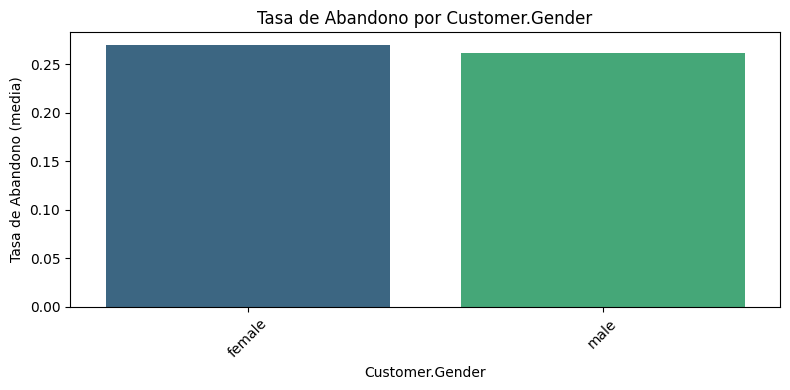

/tmp/ipython-input-21-2141178824.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=var, y="tasa_abandono", data=resumen, palette="viridis")


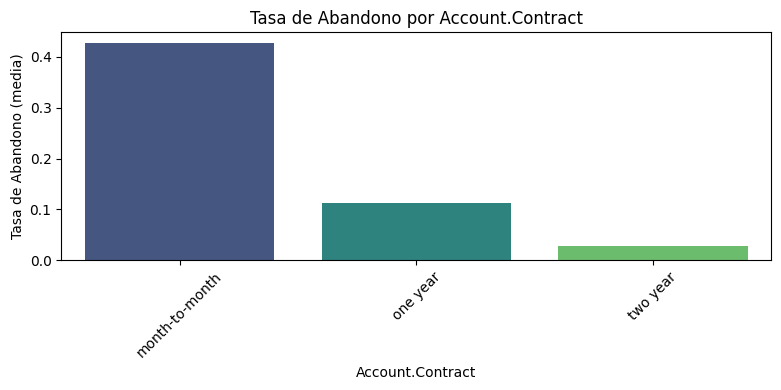

/tmp/ipython-input-21-2141178824.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=var, y="tasa_abandono", data=resumen, palette="viridis")


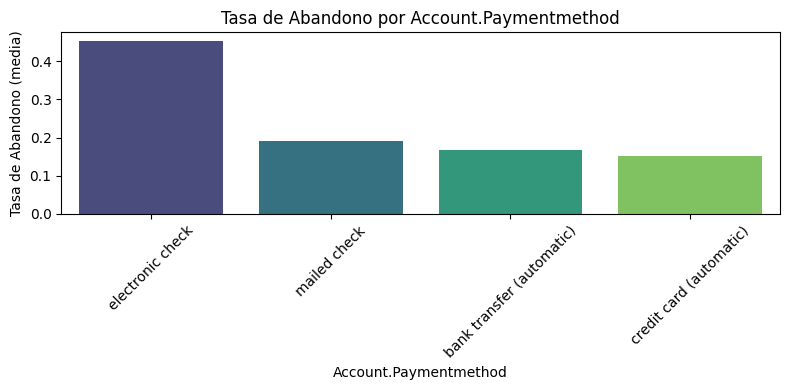

/tmp/ipython-input-21-2141178824.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=var, y="tasa_abandono", data=resumen, palette="viridis")


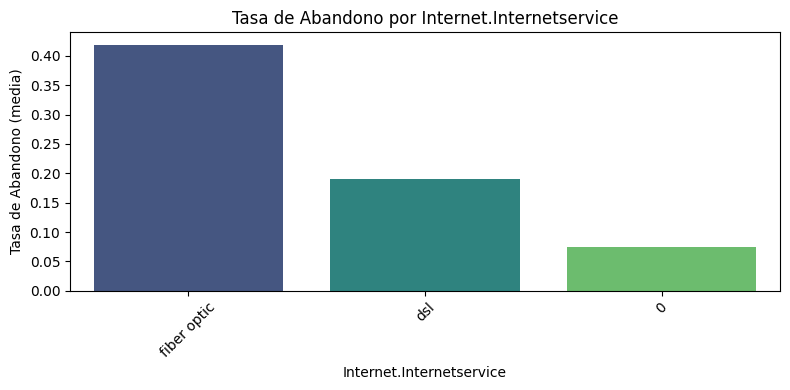

/tmp/ipython-input-21-2141178824.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=var, y="tasa_abandono", data=resumen, palette="viridis")


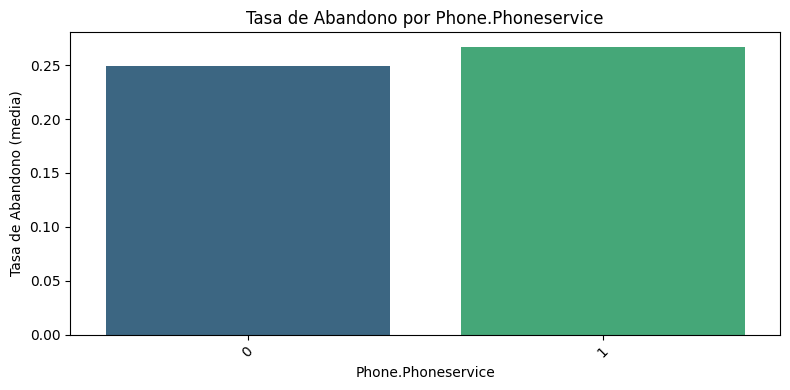

/tmp/ipython-input-21-2141178824.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=var, y="tasa_abandono", data=resumen, palette="viridis")


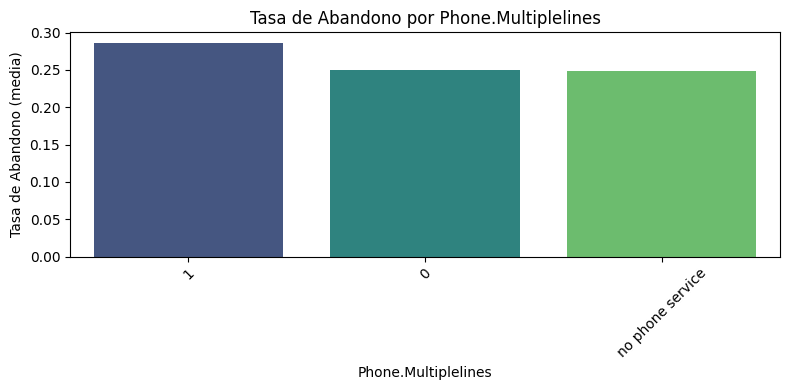

/tmp/ipython-input-21-2141178824.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=var, y="tasa_abandono", data=resumen, palette="viridis")


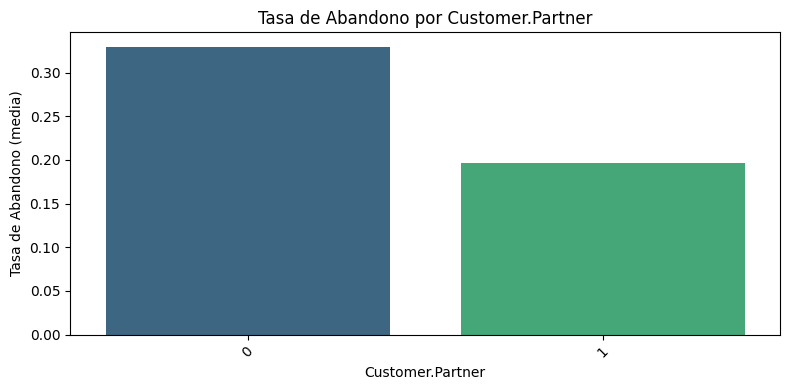

/tmp/ipython-input-21-2141178824.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=var, y="tasa_abandono", data=resumen, palette="viridis")


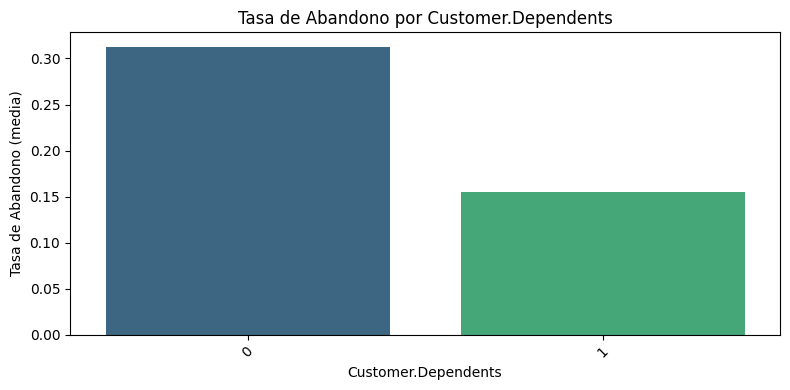

/tmp/ipython-input-21-2141178824.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=var, y="tasa_abandono", data=resumen, palette="viridis")


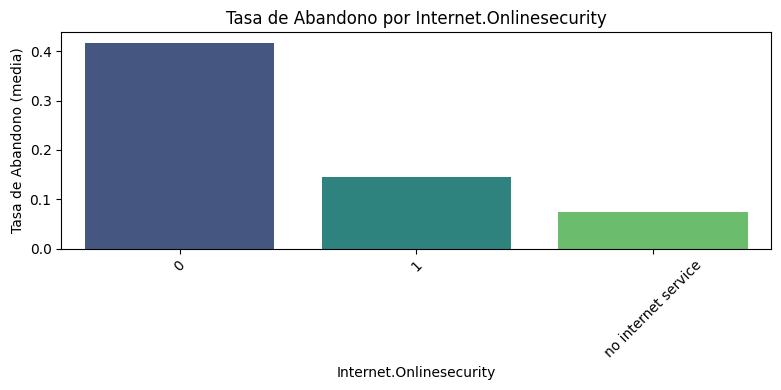

/tmp/ipython-input-21-2141178824.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=var, y="tasa_abandono", data=resumen, palette="viridis")


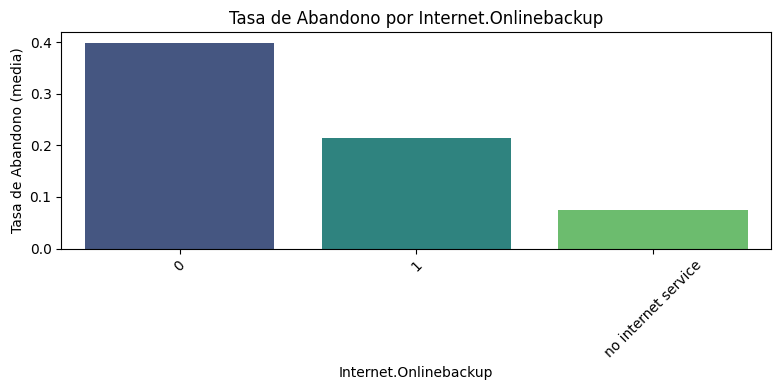

/tmp/ipython-input-21-2141178824.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=var, y="tasa_abandono", data=resumen, palette="viridis")


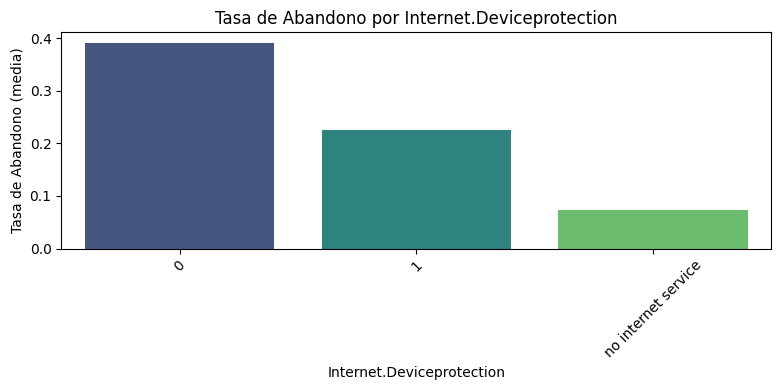

/tmp/ipython-input-21-2141178824.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=var, y="tasa_abandono", data=resumen, palette="viridis")


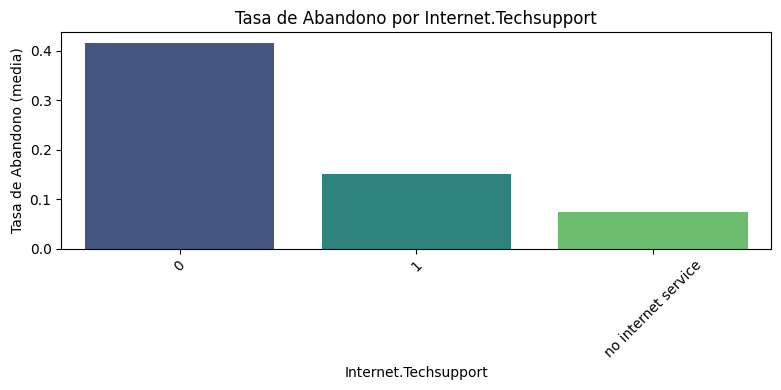

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Asegurarse de que la columna 'churn' sea num√©rica (por si qued√≥ mal codificada)
df_std["churn"] = pd.to_numeric(df_std["churn"], errors="coerce")

# Variables categ√≥ricas que queremos comparar
variables_categoricas = [
    'customer.gender', 'account.contract', 'account.paymentmethod',
    'internet.internetservice', 'phone.phoneservice', 'phone.multiplelines',
    'customer.partner', 'customer.dependents', 'internet.onlinesecurity',
    'internet.onlinebackup', 'internet.deviceprotection', 'internet.techsupport'
]

# Filtrar columnas v√°lidas para an√°lisis (categ√≥ricas o con pocos valores √∫nicos)
variables_validas = [
    col for col in variables_categoricas
    if df_std[col].dtype == 'object' or df_std[col].nunique() <= 10
]

# Funci√≥n para calcular tasa de abandono promedio por categor√≠a
def calcular_tasa_abandono(df, columna):
    resumen = df.groupby(columna)["churn"].mean().reset_index()
    resumen.columns = [columna, "tasa_abandono"]
    return resumen.sort_values("tasa_abandono", ascending=False)

# Analizar y graficar cada variable
for var in variables_validas:
    resumen = calcular_tasa_abandono(df_std, var)

    # Gr√°fico de barras
    plt.figure(figsize=(8, 4))
    sns.barplot(x=var, y="tasa_abandono", data=resumen, palette="viridis")
    plt.title(f"Tasa de Abandono por {var.replace('_', ' ').title()}")
    plt.ylabel("Tasa de Abandono (media)")
    plt.xlabel(var.replace('_', ' ').title())
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()



In [22]:
# 1. Variables categ√≥ricas a analizar
variables_categoricas = [
    'customer.gender', 'account.contract', 'account.paymentmethod',
    'internet.internetservice', 'phone.phoneservice', 'phone.multiplelines',
    'customer.partner', 'customer.dependents', 'internet.onlinesecurity',
    'internet.onlinebackup', 'internet.deviceprotection', 'internet.techsupport'
]

# 2. Funci√≥n para calcular la tasa de abandono por categor√≠a
def tasa_abandono_por_variable(df, col):
    grupo = df.groupby(col)['churn'].mean().reset_index()
    grupo.columns = ['categoria', 'tasa_abandono']
    grupo.insert(0, 'variable', col)
    grupo['tasa_abandono'] = (grupo['tasa_abandono'] * 100).round(2)
    return grupo

# 3. Crear tabla unificada
tabla_comparativa = pd.concat([tasa_abandono_por_variable(df_std, col) for col in variables_categoricas])
tabla_comparativa = tabla_comparativa.sort_values(by='tasa_abandono', ascending=False)

# 4. Mostrar tabla en Colab
from IPython.display import display
display(tabla_comparativa)



variable                  categoria  tasa_abandono
2      account.paymentmethod           electronic check          45.29
0           account.contract             month-to-month          42.71
2   internet.internetservice                fiber optic          41.89
0    internet.onlinesecurity                          0          41.77
0       internet.techsupport                          0          41.64
0      internet.onlinebackup                          0          39.93
0  internet.deviceprotection                          0          39.13
0           customer.partner                          0          32.96
0        customer.dependents                          0          31.28
1        phone.multiplelines                          1          28.61
0            customer.gender                     female          26.92
1         phone.phoneservice                          1          26.71
1            customer.gender                       male          26.16
0        phone.multiplelines                          0          25.04
0         phone.phoneservice                          0          24.93
2        phone.multiplelines           no phone service          24.93
1  internet.deviceprotection                          1          22.50
1      internet.onlinebackup                          1          21.53
1           customer.partner                          1          19.66
3      account.paymentmethod               mailed check          19.11
1   internet.internetservice                        dsl          18.96
0      account.paymentmethod  bank transfer (automatic)          16.71
1        customer.dependents                          1          15.45
1      account.paymentmethod    credit card (automatic)          15.24
1       internet.techsupport                          1          15.17
1    internet.onlinesecurity                          1          14.61
1           account.contract                   one year          11.27
2    internet.onlinesecurity        no internet service           7.40
0   internet.internetservice                          0           7.40
2  internet.deviceprotection        no internet service           7.40
2      internet.onlinebackup        no internet service           7.40
2       internet.techsupport        no internet service           7.40
2           account.contract                   two year           2.83

In [23]:
import pandas as pd

# 1. Aseguramos que las columnas num√©ricas est√©n en formato correcto
columnas_numericas = [
    "customer.tenure",             # meses_contrato
    "account.charges.monthly",     # facturacion_mensual
    "account.charges.total",       # facturacion_total
    "account.charges.daily"        # cuentas_diarias (renombrada correctamente)
]

for col in columnas_numericas:
    df_std[col] = pd.to_numeric(df_std[col], errors="coerce")

# 2. Agrupamos por abandono y calculamos la media
media_abandono = df_std.groupby("churn")[columnas_numericas].mean()

# 3. Convertimos a porcentaje respecto del total de cada columna
media_pct = media_abandono.div(media_abandono.sum(axis=0), axis=1) * 100
media_pct = media_pct.round(2)

# 4. Mostramos tabla
print("Porcentaje del total promedio por variable y estado de abandono (%):")
display(media_pct)


Porcentaje del total promedio por variable y estado de abandono (%):


customer.tenure  account.charges.monthly  account.charges.total  \
churn                                                                    
0.0              67.63                    45.15                  62.52   
1.0              32.37                    54.85                  37.48   

       account.charges.daily  
churn                         
0.0                    45.14  
1.0                    54.86

In [24]:
# Aseguramos que 'churn' est√© en formato num√©rico
df_std['churn'] = df_std['churn'].map({'yes': 1, 'no': 0}) if df_std['churn'].dtype == 'object' else df_std['churn']

# Seleccionar s√≥lo las columnas num√©ricas
numericas = df_std.select_dtypes(include='number')

# Correlaci√≥n de todas las variables num√©ricas con la evasi√≥n
correlaciones = numericas.corr()['churn'].sort_values(ascending=False)

# Mostrar correlaciones
correlaciones.to_frame(name="Correlation with churn")


Correlation with churn
churn                                   1.000000
account.charges.daily                   0.193412
account.charges.monthly                 0.193356
account.paperlessbilling                0.191825
customer.seniorcitizen                  0.150889
phone.phoneservice                      0.011942
customer.partner                       -0.150448
customer.dependents                    -0.164221
account.charges.total                  -0.199484
customer.tenure                        -0.352229

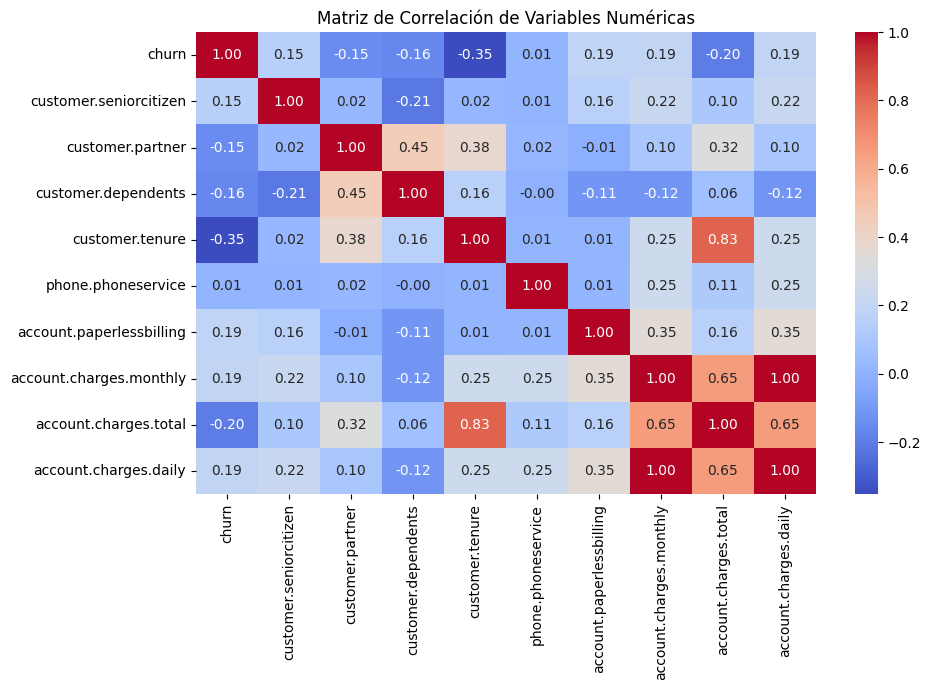

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.heatmap(numericas.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matriz de Correlaci√≥n de Variables Num√©ricas")
plt.show()


#üìÑInforme final

**üîπ Introducci√≥n**

El presente an√°lisis tiene como objetivo comprender las causas del abandono de clientes (churn) en la empresa ficticia TelecomX, a fin de identificar patrones de comportamiento y factores que influyen en la p√©rdida de usuarios. La retenci√≥n de clientes es clave, se ofreceran sugerencias para apalear el abandono

**üîπ Limpieza y Tratamiento de Datos**
Se siguieron los siguientes pasos:

Carga y normalizaci√≥n del JSON

Estandarizaci√≥n textual: Se aplic√≥ limpieza de espacios, min√∫sculas y se completaron valores faltantes con "unknown" en columnas categ√≥ricas.

Eliminaci√≥n de duplicados y verificaci√≥n de nulos.

Conversi√≥n binaria: Se mapearon valores "yes" a 1, "no" a 0 y "unknown" a NaN para an√°lisis correcto.

Creaci√≥n de nuevas variables, como:

account.charges.daily: facturaci√≥n diaria estimada.

Reemplazo de -1 por NaN para evitar distorsiones estad√≠sticas.

Conversi√≥n de columnas num√©ricas mal tipadas, como account.charges.total


**üîπ An√°lisis Exploratorio de Datos**
Se realizaron diversos an√°lisis visuales y estad√≠sticos para comparar caracter√≠sticas entre clientes que abandonaron y los que permanecen:

 Gr√°ficos y distribuciones
Tipo de contrato: Los clientes con contrato month-to-month abandonan m√°s (42.71%) que los de contratos anuales (11.27%) o de dos a√±os (7.4%).

M√©todo de pago: Electronic check muestra la tasa m√°s alta de abandono (45.29%).

Tipo de internet: Fiber optic tiene una tasa de abandono de 41.89%, superior a DSL (18.96%).

Servicios adicionales (seguridad, respaldo, soporte): Quienes no cuentan con estos servicios presentan tasas de abandono entre 39% y 42%, contra solo ~15% cuando los tienen.

Facturaci√≥n: Quienes pagan m√°s mensualmente tienen mayor propensi√≥n al abandono, aunque generan menos ingresos totales en el tiempo.

**üîπ Conclusiones e Insights**
Clientes con mayor riesgo de abandono presentan al menos uno o varios de estos factores:

Contrato month-to-month.

M√©todo de pago con electronic check.

Servicio de internet por fibra optica.

Ausencia de servicios adicionales (seguridad, soporte, respaldo).

Alta facturaci√≥n mensual.

Baja antig√ºedad (meses contratados).

Sin pareja o dependientes.

Las categor√≠as m√°s asociadas al churn fueron:

Account: variables de contrato, facturaci√≥n y pago.

Internet: tipo de conexi√≥n y servicios complementarios.

Customer: v√≠nculo familiar y antig√ºedad.

**üîπ Recomendaciones Estrat√©gicas**
Fomentar contratos a largo plazo (1 o 2 a√±os) mediante descuentos, beneficios exclusivos o estabilidad de precios.

Promover m√©todos de pago autom√°ticos (tarjeta o d√©bito bancario) con incentivos frente al uso de electronic check.

Ofrecer planes atractivos que incluyan servicios adicionales como soporte t√©cnico, respaldo o protecci√≥n para reducir el churn.

Segmentar a clientes con riesgo alto (poco tiempo de contrato, alta factura mensual) para seguimiento y campa√±as de fidelizaci√≥n personalizadas.

Realizar encuestas espec√≠ficas a usuarios de fibra optica para identificar y resolver causas de insatisfacci√≥n.

